In [1]:
from stable_baselines3 import DDPG,TD3,PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor


from stable_baselines3.common.noise import (
    NormalActionNoise,
    OrnsteinUhlenbeckActionNoise,
)
from safegym.envs import Satellite_SE2
import gymnasium as gym
from gymnasium.wrappers.time_limit import TimeLimit
import numpy as np
import os
import numpy as np
from matplotlib import pyplot as plt
import time

<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


Using Numba optimised methods.
Using Numba optimised methods.
Using Numba optimised methods.


In [2]:
from moviepy.editor import ImageSequenceClip
from tqdm import tqdm
def run_episode(
    model, env, model_name="TD3", **kargs
):
    term = False
    obs, info = env.reset()
    frames = [env.render()]
    counter = 0
    for i in tqdm(range(20_000)):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, term, trunc, info = env.step(action)
        counter += 1
        if counter % 50 == 0:
            frames.append(env.render())
        if term or trunc:
            X = np.array(env.render(), dtype=np.uint8)
            plt.imshow(X)
            term = False
            break
    env.close()
    ImageSequenceClip(frames, fps=30).write_videofile(f"{model_name}.mp4")
    

In [3]:
def env_maker(render_mode=None):
    env = gym.make(
        "Satellite-SE2-v0",
        render_mode=render_mode,
        step=np.float32(0.1),
        unconstrained=True,
        underactuated=True,
    )

    env = TimeLimit(env, max_episode_steps=20_000)
    env = Monitor(env)

    return env

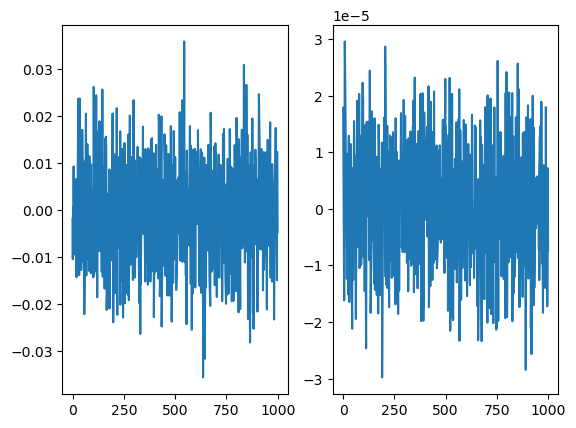

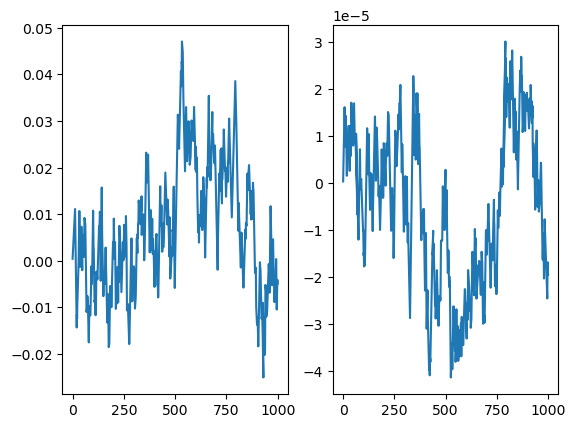

In [4]:
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
%matplotlib notebook
import numpy as np

n_actions=2
params = {
    "mean": np.zeros(n_actions),
    "sigma": np.array([0.01, 0.00001], dtype=np.float32),  # np.ones(n_actions
    "dtype": np.float32,
}
O_params = {
    "theta": 0.2,
    "dt": 1e-1,
    "initial_noise": None,
}
action_noise = NormalActionNoise(**params)
o_action_noise = OrnsteinUhlenbeckActionNoise(**params, **O_params)
noises=[]
for _ in range(1000):
  noises.append(action_noise())
%matplotlib inline

from matplotlib import pyplot
noises=np.array(noises)
fig,axs= pyplot.subplots(1,n_actions)
for i in range(n_actions):
  axs[i].plot(noises[:,i])

noises=[]
for _ in range(1000):
  noises.append(o_action_noise())
%matplotlib inline


from matplotlib import pyplot
noises=np.array(noises)
fig,axs=pyplot.subplots(1,n_actions)
for i in range(n_actions):
  axs[i].plot(noises[:,i])




In [5]:
env_name = "Satellite-SE2-v0"
Algo_name = "TD3"
date = "10_09_18_44"
last_model = "19"


models_dir = "/run/media/simone/Shared/Documenti/Magistrale/Tesi/Code/Python/Test_env/savings/" 
models_dir+= f"{env_name}/{Algo_name}/{date}/models"
model_position=f"{models_dir}/{Algo_name}_{last_model}"
# print(str(model_position))

# model_position= "/run/media/simone/Shared/Documenti/Magistrale/Tesi/Code/Python/Test_env/savings/Satellite-SE2-v0/TD3/10_08_20_15/models/TD3_1"
# print(model_position)
model=TD3.load(str(model_position))
env=env_maker(render_mode="rgb_array")
run_episode(model, env_maker(render_mode="rgb_array"))

 31%|███       | 6191/20000 [00:42<01:34, 146.77it/s]


Moviepy - Building video TD3.mp4.
Moviepy - Writing video TD3.mp4



Moviepy - Done !
Moviepy - video ready TD3.mp4
